In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
print(tf.__version__)

2.0.0


In [3]:
# Database of 60000 training images of clothes and 10000 test images
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
# Names for test labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

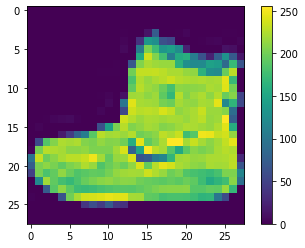

In [9]:
# Showing the first image
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
# Since each pixel value ranges from 0 to 255, scale to 0 to 1
train_images = train_images / 255.0
test_images = test_images / 255.0

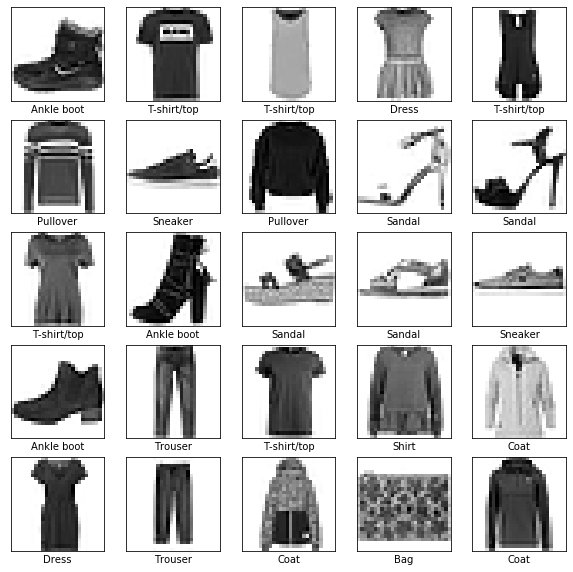

In [11]:
# Viewing first 25 images to confirm scaling
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [38]:
# Neural networks are made up of layers
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Transforms 28 x 28 array to 1D
    keras.layers.Dense(128, activation='relu'),  # Fully connected layer with 128 nodes
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax') # Fully connected 10-node layer
])

In [39]:
# Model needs to be compiled for loss function, optimizer, and metrics
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [40]:
# Train the model
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 56us/sample - loss: 0.4970 - accuracy: 0.8236
Epoch 2/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.3657 - accuracy: 0.8677
Epoch 3/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.3298 - accuracy: 0.8786
Epoch 4/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.3087 - accuracy: 0.8860
Epoch 5/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.2925 - accuracy: 0.8923
Epoch 6/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.2770 - accuracy: 0.8977
Epoch 7/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.2662 - accuracy: 0.9007
Epoch 8/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.2528 - accuracy: 0.9041
Epoch 9/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.2443 - accuracy: 0.9077
Epoch 10/10
60

In [41]:
# Results in an accuracy lower than the training accuracy: overfitting
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('n\Test accuracy:', test_acc)

10000/1 - 0s - loss: 0.2577 - accuracy: 0.8860
n\Test accuracy: 0.886


In [42]:
# After model has been trained, it can predict the results of test images
predictions = model.predict(test_images)

In [43]:
# The predictions array has the likelihood of the image belonging to a class
predictions[0]

array([1.3365060e-06, 1.1579458e-05, 1.0723087e-05, 2.7259105e-06,
       5.1519720e-07, 7.9759368e-04, 3.5892363e-06, 1.3224896e-02,
       4.7450495e-08, 9.8594701e-01], dtype=float32)

In [44]:
# The prediction is class 9
np.argmax(predictions[0])

9

In [45]:
# Is an accurate label!
test_labels[0]

9

In [46]:
# Functions to show images with predictions on histogram; red is wrong, blue is right
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

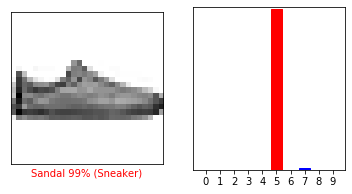

In [47]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

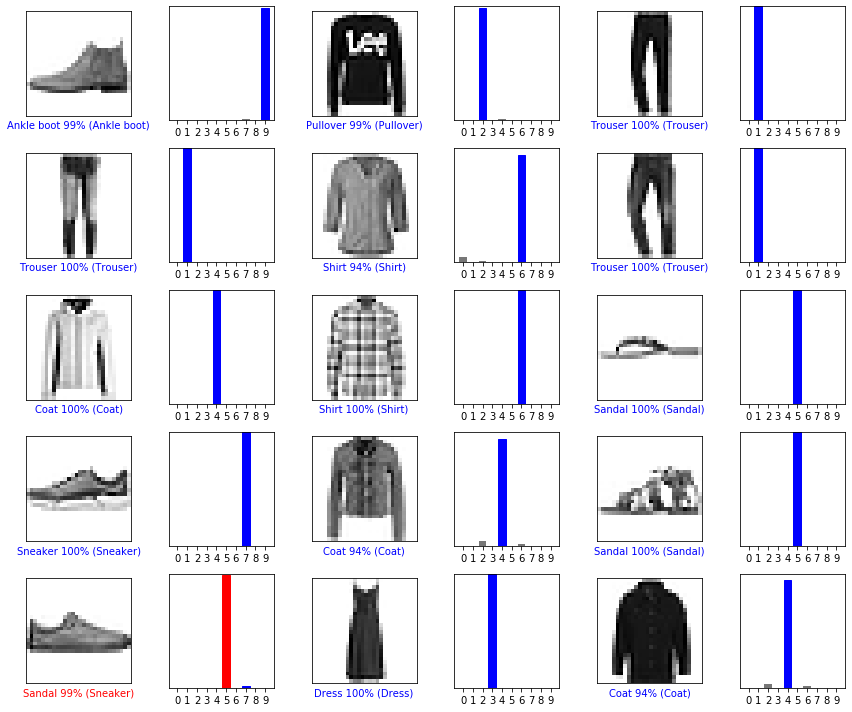

In [48]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [49]:
img = test_images[1]
print(img.shape)

(28, 28)


In [50]:
# Models can make predictions on a batch of examples
# Adding an item to a batch
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


In [51]:
predictions_single = model.predict(img)
print(predictions_single)

[[2.9213823e-04 8.3237739e-10 9.8785144e-01 7.2663113e-08 1.0943333e-02
  1.8328238e-10 9.1295765e-04 3.2041574e-11 2.3056890e-08 3.8040730e-11]]


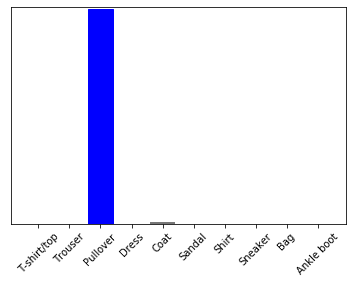

In [52]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [53]:
np.argmax(predictions_single[0])

2